<a href="https://colab.research.google.com/github/Swapn2/deep_learning/blob/main/early%2Bstopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
x,y = make_circles(n_samples = 100 , noise = .1 , random_state = 1)

<Axes: >

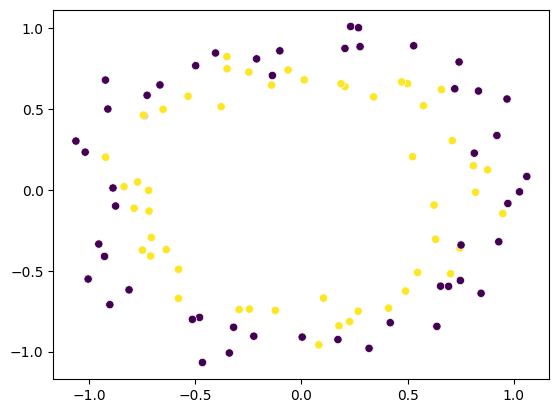

In [3]:
sns.scatterplot(x = x[:,0],y = x[:,1], c = y)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .2 , random_state = 42)

In [5]:
model = Sequential()
model.add(Dense(256, input_dim = 2 , activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss= 'binary_crossentropy' , optimizer = 'Adam' , metrics= ['accuracy'])

In [7]:
history = model.fit(x_train,y_train,validation_data = (x_test, y_test) , epochs = 3500 , verbose = 0)

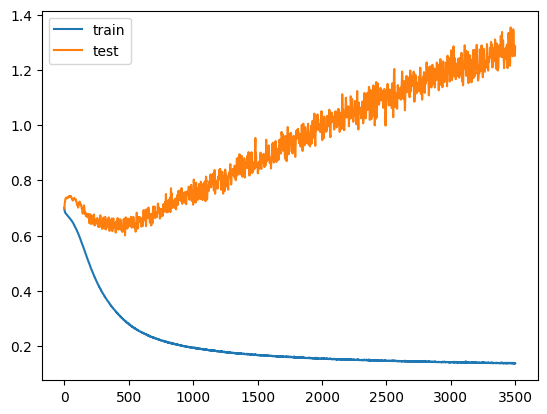

In [8]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


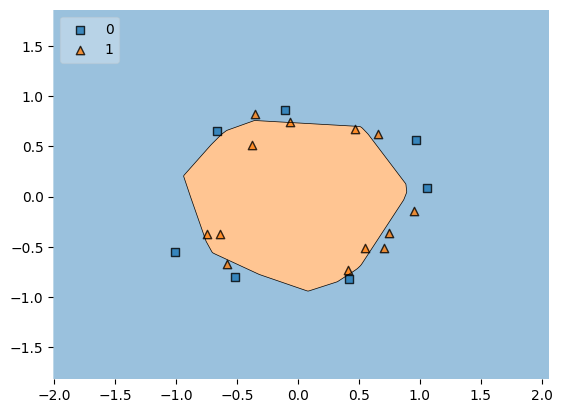

In [9]:
plot_decision_regions(x_test,y_test.ravel() , clf = model,legend = 2 )
plt.show()

In [33]:
model = Sequential()

model.add(Dense(256 , input_dim = 2 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [38]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam' , metrics=['accuracy'])

In [39]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [40]:
history = model.fit(x_train,y_train, validation_data = (x_test , y_test) , epochs = 2500 , callbacks = callback)

Epoch 1/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.5227 - loss: 0.6741 - val_accuracy: 0.3500 - val_loss: 0.7378
Epoch 2/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5070 - loss: 0.6747 - val_accuracy: 0.3500 - val_loss: 0.7385
Epoch 3/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5695 - loss: 0.6590 - val_accuracy: 0.3500 - val_loss: 0.7414
Epoch 4/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5383 - loss: 0.6685 - val_accuracy: 0.3500 - val_loss: 0.7419
Epoch 5/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5500 - loss: 0.6657 - val_accuracy: 0.3500 - val_loss: 0.7419
Epoch 6/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5188 - loss: 0.6719 - val_accuracy: 0.3500 - val_loss: 0.7415
Epoch 7/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5227 - loss: 0.6705 - val_accuracy: 0.3500 - val_loss: 0.7409
Epoch 8/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5031 - loss: 0.6759 - val_accuracy: 0.3500 - 

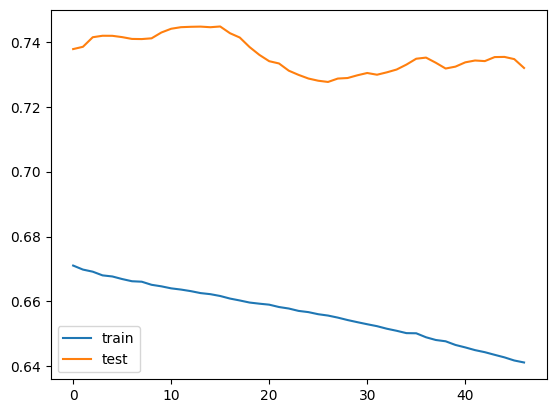

In [41]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()